# Исследование объявлений о продаже квартир

**Описание данных**: Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Цель проекта:** Провести исследовательский анализ данных, изучить как быстро продавались квартиры, выяснить какие факторы сильнее влияют на общую стоимость объекта. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра и вычислить среднюю цену каждого километра.

**Описание данных:** О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

## Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


### Строим гистограммы для первичного анализа

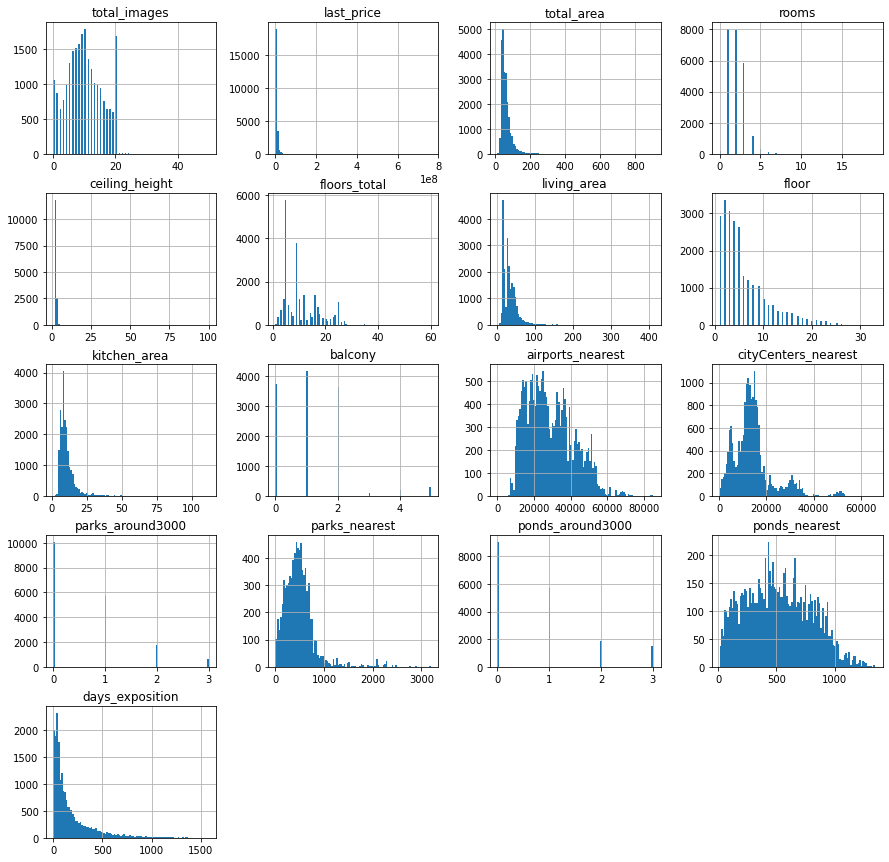

In [4]:
data.hist(bins = 100, figsize = (15,15));

**Вывод:** В таблице 23700 строк, сразу можно обратить внимание что расстояние до парков и до водоемов указано в 1/3 данных. В основном квартиры с 1 или 2 комнатами и балконы имеют половина квартир. В радиусе 3км у большинства квартир нет ни парков, ни озер


## Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# пропущенные значения бары
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Количество пропусков по стобцам' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

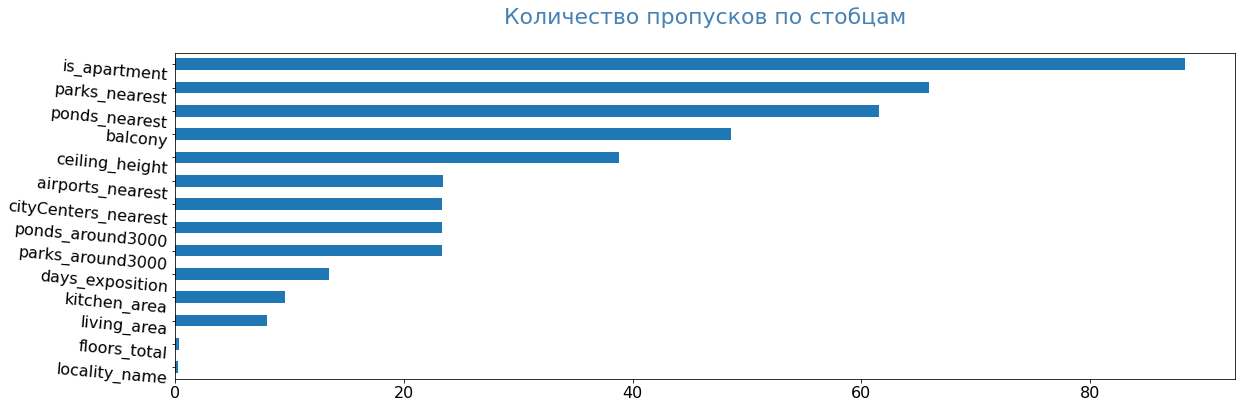

In [7]:
pass_value_barh(data)

Больше всего пропусков в столбце is_apartment, а в столбцы floors_total и  locality_name почти на 100% заполнены

### Замена типа данных

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition'].head(2);

In [10]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [11]:
data['floors_total'] = data['floors_total'].astype('Int64')

**Вывод:** Поменял тип данных в столбце 'days_exposition' на int, а в столбце 'floors_total' на int, т.к здесь указывается количество этажей в доме и это число не может быть вещественным. Так же в столбце first_day_exposition на datatime и сократили до дня

### Работа с пропусками

In [13]:
data['living_area'] = (data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('mean'))).round() 
#заполним пропуски средними значиниями сгруппировав по количеству комнат  

In [14]:
data['kitchen_area'] = (data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('mean'))).round()
#заполним пропуски средними значиниями сгруппировав по количеству комнат  

In [15]:
data[data['total_area']*0.9 >= data['living_area'] + data['kitchen_area']].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,19.0,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.0,4,False,...,8.0,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558


22343 строки проходят по условии 

In [16]:
data['floors_total'] = data['floors_total'].fillna(data.groupby('rooms')['floors_total'].transform('median'))
#Заполним пропуски мединой для начала сгруппировав по количетсву комнат

In [17]:
data = data.dropna(subset=['locality_name'])

In [18]:
data.isna().sum() #проверяем на пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

**Вывод:** 
Пропуски есть почти на каждой строке 
ceiling_height (высота потолков) почти во всех домах стандартная высота потолков, но минимально значение высоты в таблице 1, а максимальная 100
floors_total (этажность дома), living_area (площадь) скорее человеческая ошибка, тоже можно заменить медианным значением  
is_apartment, balcony, булевые значения, там где пропуски просто нет балкона и тд.
locality_name решил удалить пустые строки 
airports_nearest (раст до аэропорта),
days_exposition (дней до снятия) возможно реклама все еще висит 

### Изучаем уникальные значения в столбце с названиями

In [19]:
# Проверяем уникальные значения в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
name = ['посёлок городского типа имени', 'поселок городского типа', 'посёлок городского типа', 'садовое товарищество', 'посёлок при железнодорожной станции', 'поселок при железнодорожной станции', 'садоводческое некоммерческое товарищество', 'посёлок станции', 'городской посёлок', 'поселок станции', 'городской поселок', 'посёлок', 'деревня', 'коттеджный поселок', 'коттеджный', 'поселок', 'село']
def locality_name(locality_name):
    for n in name:
        if n in locality_name:
            return locality_name.replace(n,'').strip()
    return locality_name

In [21]:
 data['locality_name'] = data['locality_name'].apply(locality_name)

In [22]:
 data['locality_name'].apply(locality_name).unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [23]:
# Считаем количество уникальных значений в столбце locality_name
data['locality_name'].nunique()

307

### Редкие и выбивающиеся значения

#### Редкие и выбивающиеся значения в столбце 'ceiling_height'

In [24]:
# Считаем количество уникальных значений в столбце ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [25]:
def correct_height(x):
    if (x//10 >= 2):
        return (x/10)
    else:
        return x

In [26]:
data['ceiling_height'] = data['ceiling_height'].apply(correct_height)

In [27]:
# Избавляемся от значений, что меньше 2,65 и больше 4,5м
def correct_height(height):  
    if (height<=2) | (height>=4.5):
        return 2.65
    else:
        return height

In [28]:
data['ceiling_height'] = data['ceiling_height'].apply(correct_height)

In [29]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.723683
std          0.264472
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.450000
Name: ceiling_height, dtype: float64

In [30]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54,
       3.53, 2.83, 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57,
       2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67,
       3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.2 , 3.36, 3.08, 3.68, 3.07,
       3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22,
       3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17,
       4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.49, 4.14,
       2.91, 3.88, 4.25, 3.29, 2.25, 3.76, 3.69, 2.

#### Заполняем пропуски в last_price и убираем значения <1000 & > 25млн

In [31]:
data.sort_values(by = 'last_price').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.0,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,0
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,32.0,3,False,...,10.0,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,18.0,1,False,...,10.0,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45
17676,0,450000.0,36.5,2018-02-01,1,NaN,5,17.0,4,False,...,8.0,1,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.0,3,False,...,6.0,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,False,...,6.0,0,Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,32.0,1,False,...,10.0,0,Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45
23484,11,470000.0,44.5,2018-07-02,2,NaN,2,28.0,2,False,...,8.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298
18867,1,470000.0,41.0,2018-02-11,1,NaN,5,32.0,3,False,...,9.0,0,Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46


In [32]:
data['last_price'] = data['last_price'].fillna('median')

In [33]:
data = data[(data['last_price'] > 500000)]

In [34]:
data = data[(data['last_price'] <= 25000000)]

#### Заполняем пропуски в total_area и убираем значения где больше 250 и больше 12

In [35]:
data['total_area'] = data['total_area'].fillna('median')

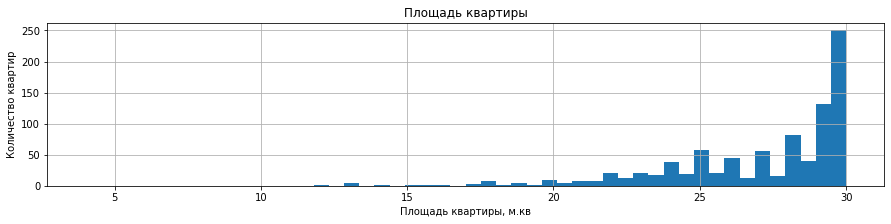

In [36]:
data.hist(column = 'total_area', bins = 50, figsize = (15,3), range = (4,30)) ##выводим квартиры с площадью меньше 30мкв.
plt.title('Площадь квартиры')
plt.xlabel('Площадь квартиры, м.кв')
plt.ylabel('Количество квартир');

In [37]:
data = data[(data['total_area']<=250)]

In [38]:
data = data[(data['total_area']>=20)]

#### Удаляем строки где кол-во комнат больше 7

In [39]:
data[(data['rooms'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,16.0,2,False,...,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.0,1,False,...,NaN,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,25.0,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.0,19,False,...,NaN,1,Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,19.0,7,False,...,NaN,0,Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.0,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.0,4,False,...,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,19.0,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.0,8,False,...,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82


In [40]:
data['rooms'] = data['rooms'].fillna('median')#заполняем пропуски медианнымы значениями

In [41]:
data = data[(data['rooms']<=7)];

**Вывод:** Самые большое количество ошибок в столбце ceiling_height, тут я поменял сначала те значения что больше 20м и убрал строки где потолок ниже 2 метров, но выше 4,5. в столбце цены указаны были цены очень маленькие, оставил те что больше 1000 и убрал те, что дороже 25млн;

#### Заполняем пропуски и удаляем строки в столбце 'days_exposition'

In [42]:
data['days_exposition'].describe()

count    23115.000000
mean       155.080640
std        211.320583
min          0.000000
25%         23.000000
50%         73.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [43]:
(
    data[['days_exposition', 'floors_total']]
    .quantile([0.01, .5, .99, 1])  
    .style.format("{:,.2f}")
)

,days_exposition,floors_total
0.01,0.00,2.00
0.5,73.00,9.00
0.99,"1,021.86",26.00
1.0,"1,580.00",60.00


In [44]:
data = data[data['days_exposition']<1000]

In [45]:
# check
data.shape[0]

22854

#### Удаляем аномальные значения в floors_total

In [46]:
data[(data['floors_total'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [47]:
data = data[data['floors_total'] <=26]

#### Удаляем значения в living_area

In [48]:
data[(data['living_area'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


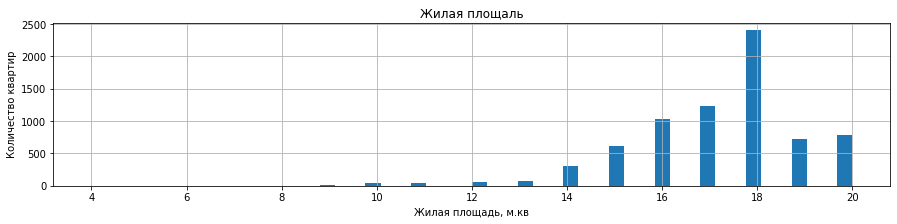

In [49]:
data.hist(column = 'living_area', bins = 50, figsize = (15,3), range = (4,20))
plt.title('Жилая площаль')
plt.xlabel('Жилая площадь, м.кв')
plt.ylabel('Количество квартир');

In [50]:
data = data[data['living_area'] <=125]

In [51]:
data = data[data['living_area'] >=10]

#### Удаляем значения в kitchen_area

In [52]:
data[(data['kitchen_area'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


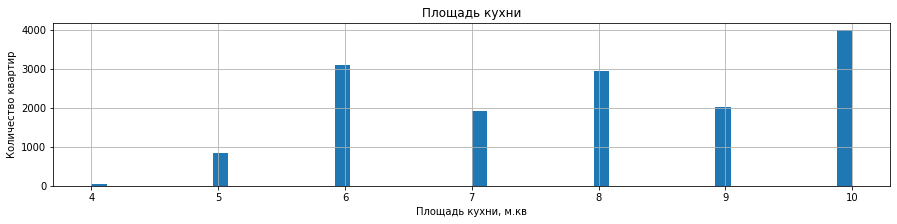

In [53]:
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (4,10))
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, м.кв')
plt.ylabel('Количество квартир');

In [54]:
data = data[data['kitchen_area'] <= 40]

In [55]:
data = data[data['kitchen_area'] >= 5]

In [56]:
data.shape[0]

22251

Убрали чуть больше 1000 строк из архива, что меньше 5%

### Проверка данных

In [57]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,251.00","22,251.00","13,665.00","22,251.00","22,251.00","22,251.00","22,251.00","22,251.00","22,251.00"
min,1.00,20.00,2.25,0.00,"520,000.00",10.00,5.00,1.00,1.00
max,7.00,250.00,4.40,999.00,"25,000,000.00",125.00,40.00,26.00,26.00


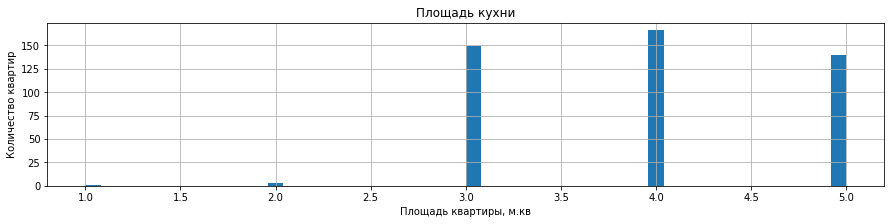

In [58]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (1,5))
plt.title('Площадь кухни')
plt.xlabel('Площадь квартиры, м.кв')
plt.ylabel('Количество квартир');

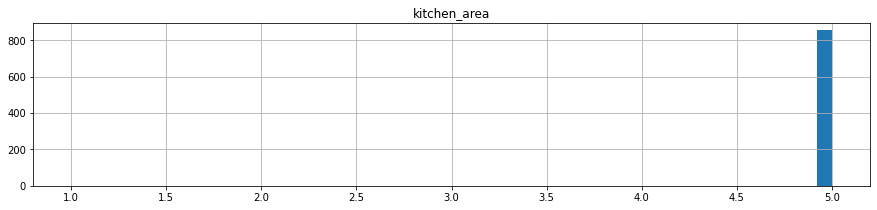

In [59]:
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (1,5));

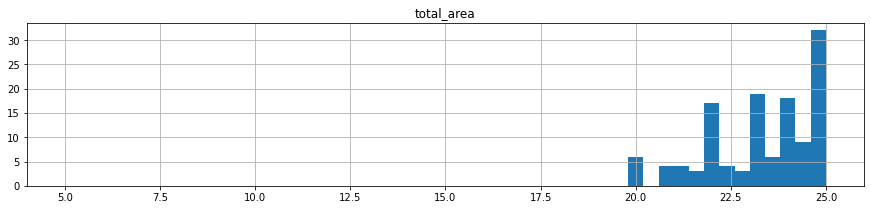

In [60]:
data.hist(column = 'total_area', bins = 50, figsize = (15,3), range = (5, 25));

In [61]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .98, .9976, 1])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,28.00,2.50,0.00,"1,000,000.00",14.00,5.00,1.00,2.00
0.5,2.00,51.40,2.65,71.00,"4,600,000.00",30.00,10.00,4.00,9.00
0.98,4.00,125.50,3.50,729.00,"16,500,000.00",77.00,23.00,20.00,25.00
0.9976,6.00,174.80,4.00,956.60,"23,500,000.00",108.00,35.60,24.00,26.00
1.0,7.00,250.00,4.40,999.00,"25,000,000.00",125.00,40.00,26.00,26.00


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22251 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22251 non-null  int64         
 1   last_price            22251 non-null  float64       
 2   total_area            22251 non-null  float64       
 3   first_day_exposition  22251 non-null  datetime64[ns]
 4   rooms                 22251 non-null  int64         
 5   ceiling_height        13665 non-null  float64       
 6   floors_total          22251 non-null  Int64         
 7   living_area           22251 non-null  float64       
 8   floor                 22251 non-null  int64         
 9   is_apartment          22251 non-null  bool          
 10  studio                22251 non-null  bool          
 11  open_plan             22251 non-null  bool          
 12  kitchen_area          22251 non-null  float64       
 13  balcony         

In [63]:
data.rooms.value_counts().to_frame()

,rooms
1,7757
2,7680
3,5515
4,1024
5,220
6,44
7,11


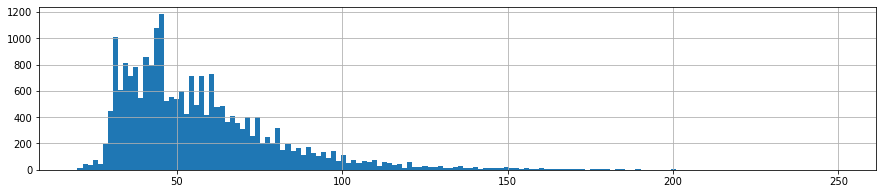

In [64]:
data.total_area.hist(bins = 150, figsize = (15,3));

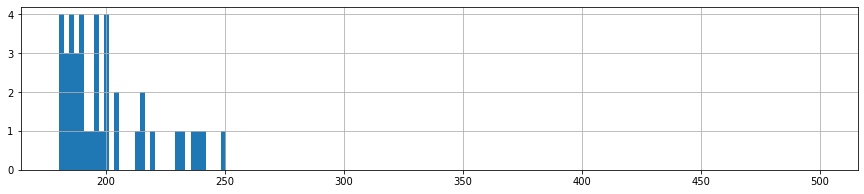

In [65]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

## Посчитайте и добавьте в таблицу новые столбцы

### Добавление в таблицу новых столбцов

Добавим столбец стоимости 1м.кв.

In [66]:
data['price_one'] = data['last_price']/data['total_area'] 

День, месяц и год побликации объявления

In [67]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [68]:
data[['weekday', 'month', 'year']]

,weekday,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
5,0,9,2018
6,3,11,2017
...,...,...,...
23694,1,3,2017
23695,0,1,2018
23696,6,2,2018
23697,1,3,2017


Добавим столбец, показывающий тип этажа квартиры

In [69]:
def floor_type (floor, floors_total):
    if floor == 1: 
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [70]:
data['floor_type'] = data.apply(lambda stroka: floor_type(stroka.floor, stroka.floors_total), axis=1)
data[['floors_total','floor','floor_type']]

,floors_total,floor,floor_type
0,16,8,другой
1,11,1,первый
2,5,4,другой
5,12,5,другой
6,26,6,другой
...,...,...,...
23694,5,3,другой
23695,5,4,другой
23696,3,1,первый
23697,17,12,другой


Расстояние до центра в км

In [71]:
data['city_сenters_km'] = data['cityCenters_nearest']//1000
data[['cityCenters_nearest', 'city_сenters_km']].head(2)

,cityCenters_nearest,city_сenters_km
0,16028.0,16.0
1,18603.0,18.0


## Проведем исследовательский анализ данных

### Изучение объектов по гистограмме

#### Площадь квартиры

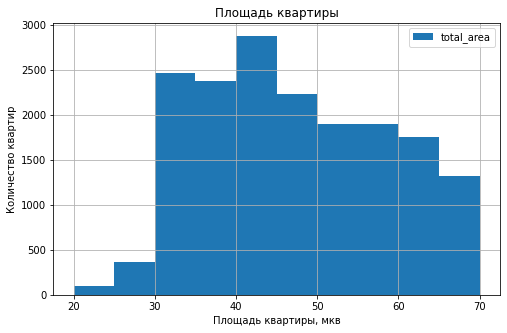

In [72]:
data.plot(y='total_area', kind='hist', figsize=(8,5), grid=True, range = (20, 70))
plt.title('Площадь квартиры')
plt.xlabel('Площадь квартиры, мкв')
plt.ylabel('Количество квартир');

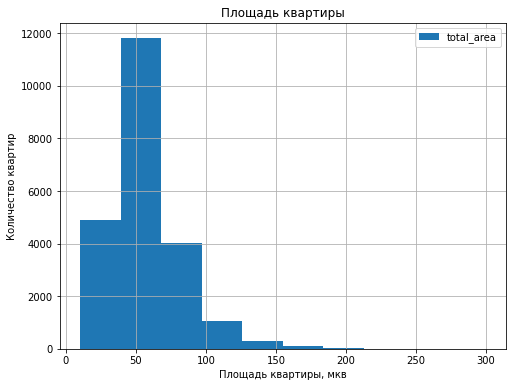

In [73]:
data.plot(y='total_area', kind='hist', figsize=(8,6), grid=True, range = (10, 300))
plt.title('Площадь квартиры')
plt.xlabel('Площадь квартиры, мкв')
plt.ylabel('Количество квартир');

Преобладают квартиры, где общая площадь квартиры на уровне 40м.кв, если брать общий срез то большинство из них от 20 до 80 мкв. и их больше 10000 

#### Жилая площадь 

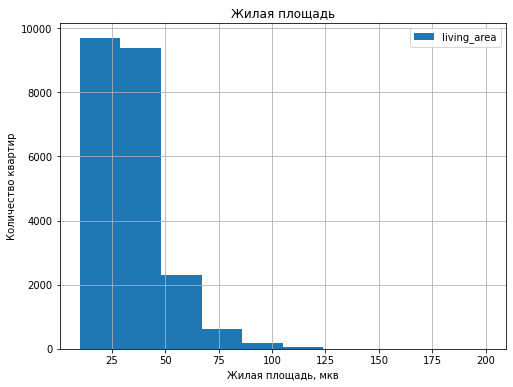

In [74]:
data.plot(y='living_area', kind='hist', figsize=(8,6), grid=True, range = (10, 200))
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь, мкв')
plt.ylabel('Количество квартир');

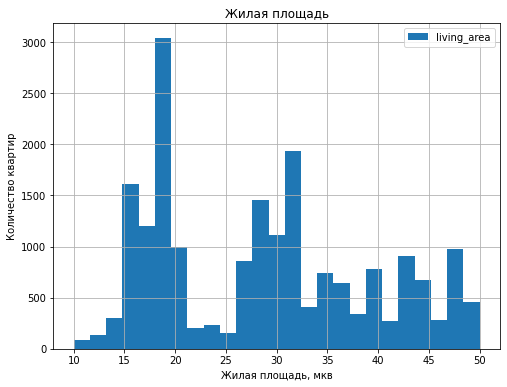

In [75]:
data.plot(y='living_area', kind='hist', figsize=(8,6), grid=True, range = (10, 50), bins=25)
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь, мкв')
plt.ylabel('Количество квартир');

В столбце жилая площадь около преобладает варианты от 14 до 19 и от 26 до 34мкв 

#### Площадь кухни

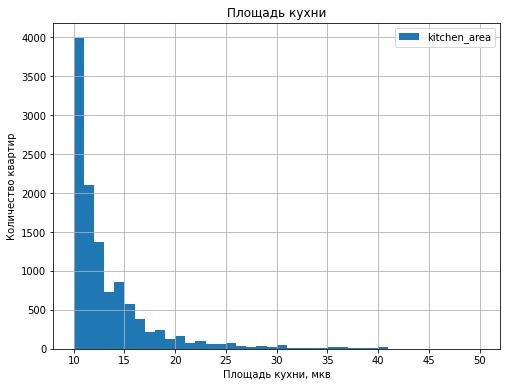

In [76]:
data['kitchen_area'].describe()
data.plot(y='kitchen_area', kind='hist', bins = 40, figsize=(8,6), grid=True, range = (10, 50))
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, мкв')
plt.ylabel('Количество квартир');

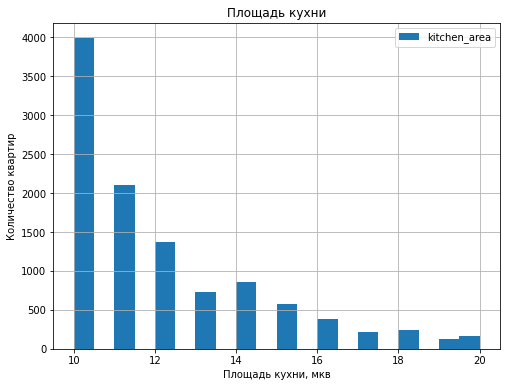

In [77]:
data.plot(y='kitchen_area', kind='hist', bins = 20, figsize=(8,6), grid=True, range = (10, 20));
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, мкв')
plt.ylabel('Количество квартир');

Преобладает где площадь от 10 до 11м.кв. По гистограмме видно, что количество предложений прямопропорционально падает с увеличением площиди кухни 

#### Цена объекта

In [78]:
data['last_price'].max()
data['last_price']=data['last_price']/1000000

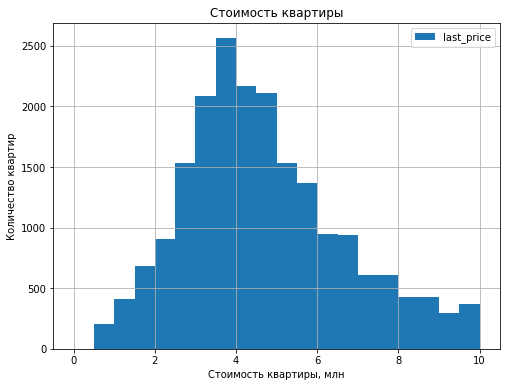

In [79]:
data['last_price'].describe()
data.plot(y='last_price', kind='hist', figsize=(8,6), grid=True, range = (0,10), bins=20);
plt.title('Стоимость квартиры')
plt.xlabel('Стоимость квартиры, млн')
plt.ylabel('Количество квартир');

Больше всего квартир в районе 4-5лн

#### Количество комнат

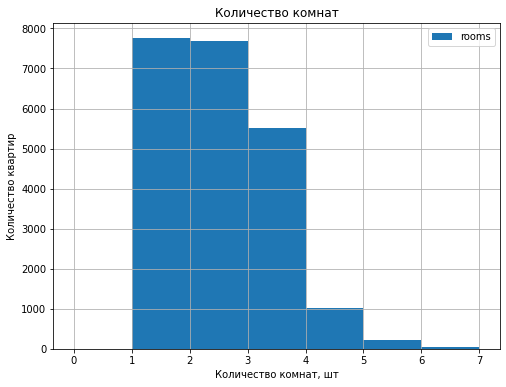

In [80]:
data['rooms'].describe()
data.plot(y='rooms', kind='hist', figsize=(8,6), grid=True, bins = 7, range = (0, 7));
plt.title('Количество комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество квартир');

Преобладают варианты квартир с 1 ил 2 комнатами и чуть меньше с 3 комнатами, так же на рынке есть варианты квартиры студии без комнат

#### Высота потолков

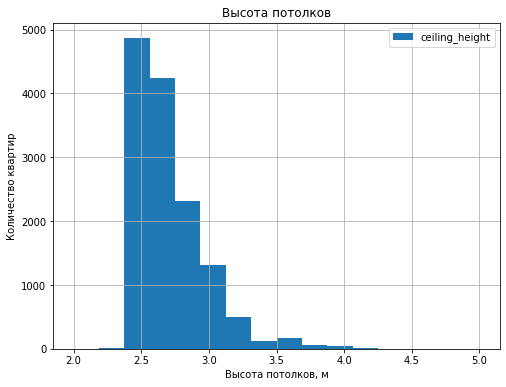

In [81]:
data['ceiling_height'].describe()
data.plot(y='ceiling_height', kind='hist', bins = 16, figsize=(8,6), grid=True, range = (2,5));
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир');

Больше всего вариантов, где высота потолка от 2,3 до 2,8м Потолки выше 3,5 метра очень редко встречается 

#### Количество этажей

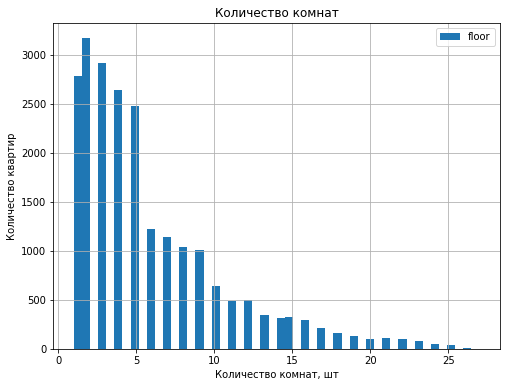

In [82]:
data['floor'].describe()
data.plot(y='floor', kind='hist', figsize=(8,6), grid=True, bins = 50, range = (1,27))
plt.title('Количество комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество квартир');

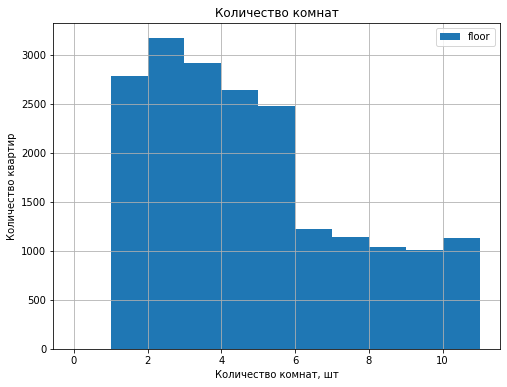

In [83]:
data.plot(y='floor', kind='hist', figsize=(8,6), grid=True, bins = 11, range = (0,11))
plt.title('Количество комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество квартир');

В продаже больше всего квартир от 1 до 5 этажа. Это можно объяснить тем, что в маленьких городах, мало высокий домов 

#### Тип этажа 

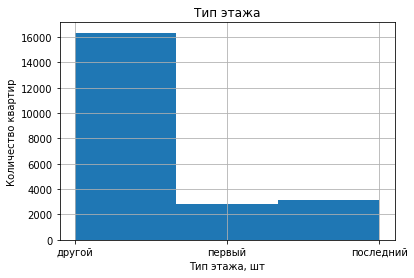

In [84]:
data['floor_type'].describe()
data['floor_type'].hist(bins=3)
plt.title('Тип этажа')
plt.xlabel('Тип этажа, шт')
plt.ylabel('Количество квартир');

Квартиры что находятся на 1 и на послдних этажах в разы меньше чем в категории "другой"


#### Общее количество этажей в доме

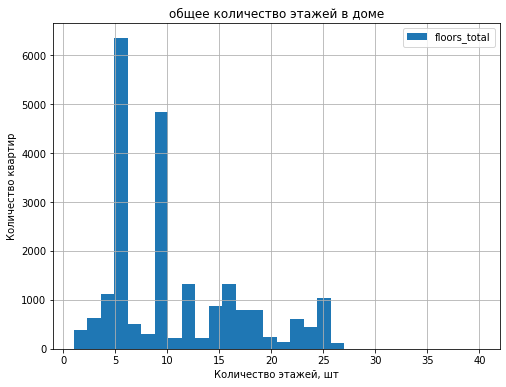

In [85]:
data['floors_total'].describe()
data.plot(y='floors_total', kind='hist', figsize=(8,6), grid=True, bins = 30, range = (1,40))
plt.title('общее количество этажей в доме')
plt.xlabel('Количество этажей, шт')
plt.ylabel('Количество квартир');

в продаже преобладает 2 типа варианта домов: 5 и 10 этажные дома

#### Расстояние до центра города в метрах

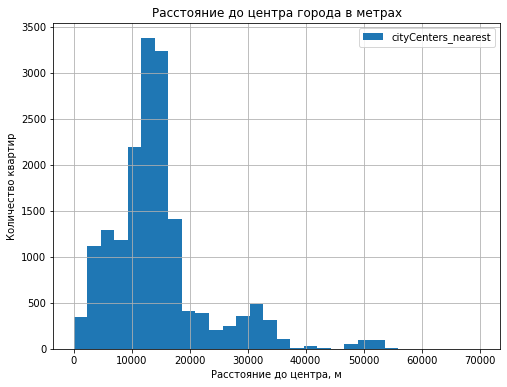

In [86]:
data['cityCenters_nearest'].describe()
data.plot(y='cityCenters_nearest', kind='hist', figsize=(8,6), grid=True, bins = 30, range = (1,70000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество квартир');

Среди предложенных вариантов, большинство вариантов находятся в 10000-15000м в удаленности от центра 

#### Расстояние до ближайшего аэропорта

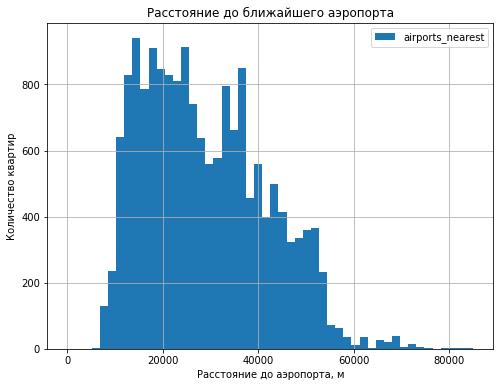

In [87]:
data['airports_nearest'].describe()
data.plot(y='airports_nearest', kind='hist', figsize=(8,6), grid=True, bins = 50, range = (1,85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Количество квартир');

Почти все варианты находятся в удаленности в 10-40км 

#### Расстояние до ближайшего парка

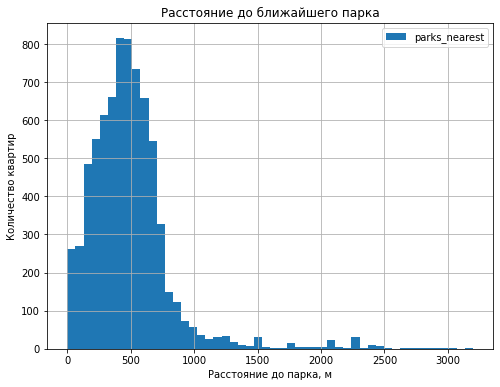

In [88]:
data['parks_nearest'].describe()
data.plot(y='parks_nearest', kind='hist', figsize=(8,6), grid=True, bins = 50, range = (1,3200));
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество квартир');

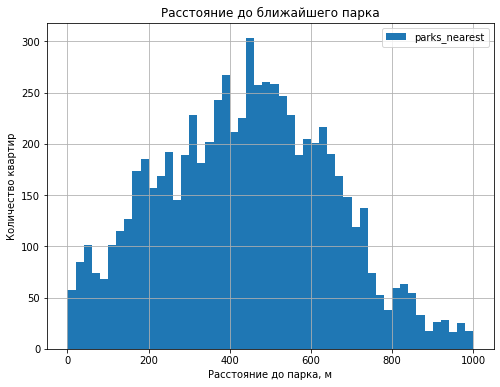

In [89]:
data.plot(y='parks_nearest', kind='hist', figsize=(8,6), grid=True, bins = 50, range = (0,1000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество квартир');

По гистограмме видно, что у основной массы вариантов рядом есть парк (ср. значение 200-600м.)

#### День и месяц публикации объявления

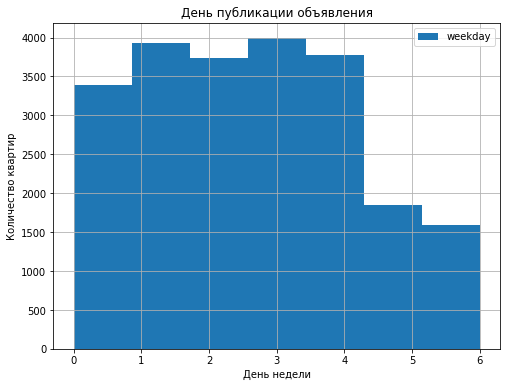

In [90]:
data['weekday'].describe()
data.plot(y='weekday', kind='hist', figsize=(8,6), grid=True, bins = 7, range = (0,6))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир');

Большинство объявлений выкладываются в будний день, особо выделяется вторник и четверг

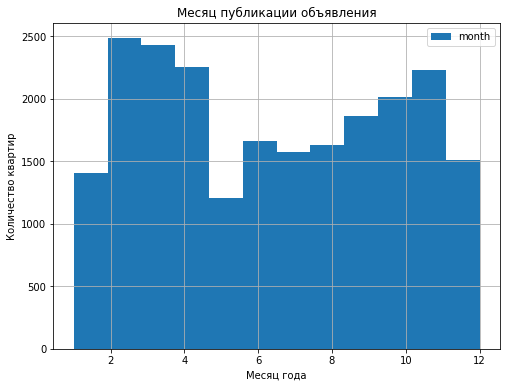

In [91]:
data['month'].describe()
data.plot(y='month', kind='hist', figsize=(8,6), grid=True, bins = 12, range = (1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц года')
plt.ylabel('Количество квартир');

Больше объявлений выложено в феврале, ближе к лету идет просадка, а после мая количество объявлений только увеличивается, вплоть до декабря

### Как быстро продавались квартиры

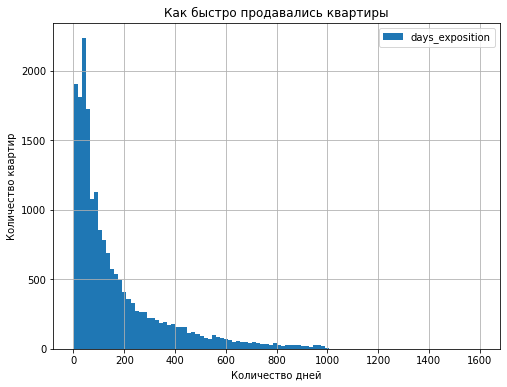

In [92]:
data.plot(y='days_exposition', kind='hist', figsize=(8,6), grid=True, bins = 100, range = (1,1600))
plt.title('Как быстро продавались квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

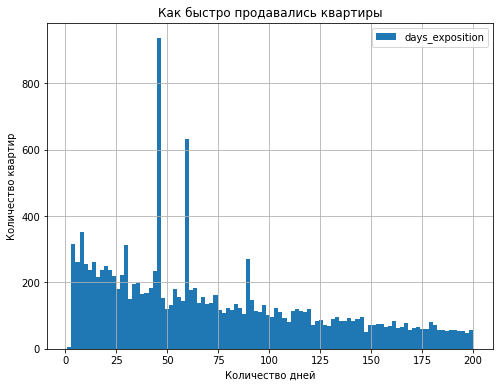

In [93]:
data.plot(y='days_exposition', kind='hist', figsize=(8,6), grid=True, bins = 100, range = (1,200))
plt.title('Как быстро продавались квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

In [94]:
data['days_exposition'].describe()

count    22251.000000
mean       143.956541
std        182.427383
min          0.000000
25%         22.000000
50%         71.000000
75%        190.000000
max        999.000000
Name: days_exposition, dtype: float64

In [95]:
data['days_exposition'].median() 

71.0

In [96]:
data['days_exposition'].mean() 

143.95654127904365

 Среднее время продажи занимает 143 дней, а медиана 71 день. Можно сделать вывод что быстрая продажа 22 дней, а вот после 190 уже можно считать что долгая продажа

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

#### Общая площадь

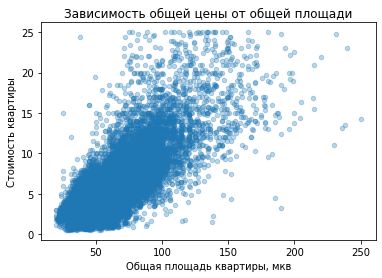

In [97]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.3)
data['last_price'].corr(data['total_area'])
plt.title('Зависимость общей цены от общей площади')
plt.xlabel('Общая площадь квартиры, мкв')
plt.ylabel('Стоимость квартиры');

Коэф. Пирсона показывает что есть зависимоть и он ровняется 0,78 по графику видим, что с ростом квадратуры растет и цена 

#### Жилая площадь 

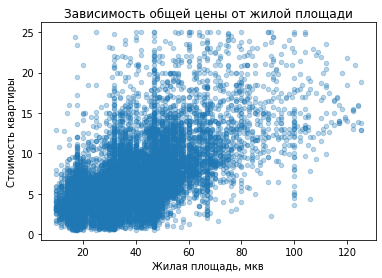

In [98]:
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter', alpha = 0.3);
data['last_price'].corr(data['living_area'])
plt.title('Зависимость общей цены от жилой площади')
plt.xlabel('Жилая площадь, мкв')
plt.ylabel('Стоимость квартиры');

Тут такая же зависимость, что показывает и коэффициент 

#### Площадь кухни

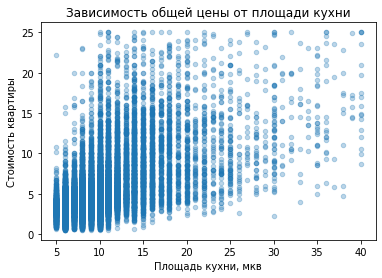

In [99]:
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter', alpha = 0.3);
data['last_price'].corr(data['kitchen_area'])
plt.title('Зависимость общей цены от площади кухни')
plt.xlabel('Площадь кухни, мкв')
plt.ylabel('Стоимость квартиры');

#### Количество комнат

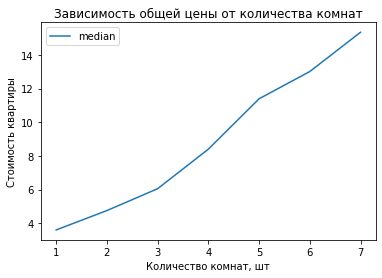

In [100]:
graf = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median']);
graf.columns = ['mean', 'count', 'median'];
graf.plot(y = 'median')
plt.title('Зависимость общей цены от количества комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Стоимость квартиры');

Зависимость сохраняется, но она не такая выраженная 

#### Этаж на котором расположена квартира

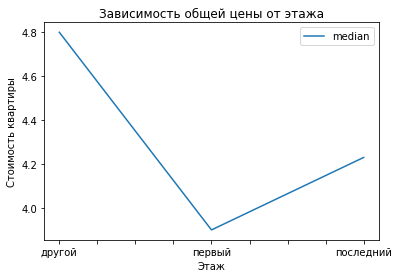

In [101]:
graf = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median']);
graf.columns = ['mean', 'count', 'median'];
graf.plot(y = 'median')
plt.title('Зависимость общей цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры');

По сводной таблице видно, что цена за первый этаж самая низкая, а стоимость повыше друг от друга почти не отличаются 

#### Даты размещения 

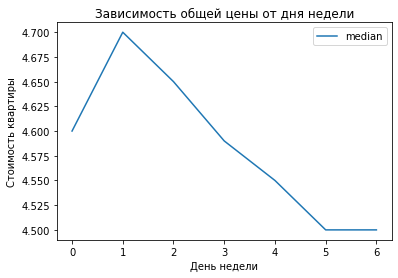

In [102]:
graf = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median']);
graf.columns = ['mean', 'count', 'median'];
graf.plot(y = 'median')
plt.title('Зависимость общей цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры');

Самая высокая цена во вторник, в пятницу и в воскресенье мало выкладываются объявления  

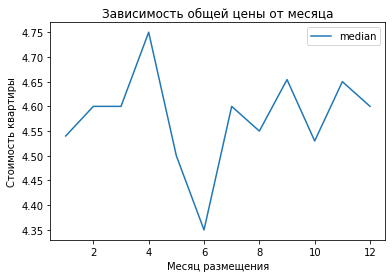

In [103]:
graf = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median']);
graf.columns = ['mean', 'count', 'median'];
graf.plot(y = 'median')
plt.title('Зависимость общей цены от месяца')
plt.xlabel('Месяц размещения')
plt.ylabel('Стоимость квартиры');

В начале года цены примерно на одном уровне,в июне идет просадка, но с августа цену начинают скакать 

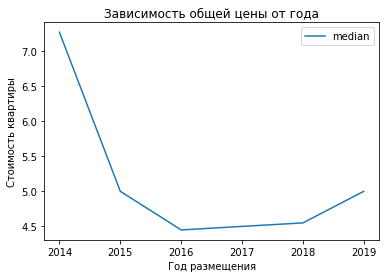

In [104]:
graf = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median']);
graf.columns = ['mean', 'count', 'median'];
graf.plot(y = 'median')
plt.title('Зависимость общей цены от года')
plt.xlabel('Год размещения')
plt.ylabel('Стоимость квартиры');

Цена до 2018 года стремилась вниз, но с 2018 года пошел рост

### Среднюю цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [105]:
data['price_one'] = data['last_price']/data['total_area']
data[['price_one']].head()

,price_one
0,0.120370
1,0.082921
2,0.092786
5,0.095066
6,0.099196


In [106]:
locality_pivot = data.pivot_table(index = 'locality_name', values = 'price_one', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean'] #переименуем столбцы 

In [107]:
locality_pivot.sort_values(by = 'count', ascending = False).head(10) 

,count,mean
locality_name,,
Санкт-Петербург,14688,0.109436
Мурино,477,0.085476
Кудрово,444,0.095166
Шушары,428,0.078222
Всеволожск,388,0.068664
Пушкин,352,0.102275
Колпино,335,0.075280
Гатчина,305,0.068765
Парголово,262,0.089098


Самое большое количество объявлений в Санкт-Петербурге

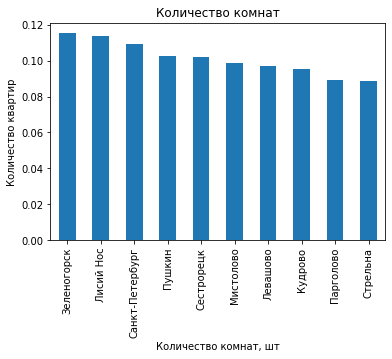

In [108]:
data_top = data.groupby('locality_name')['price_one'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.title('Количество комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество квартир');

Как мы видим по графику, самый дорогой квадратный метр квартиры в Зеленогорск, а самый дешевый Стрельна

#### Выделим квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра.

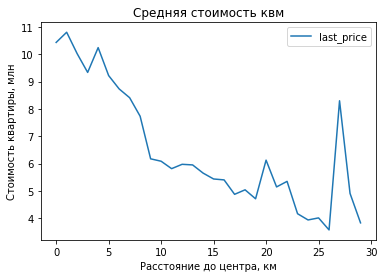

In [109]:
data['city_сenters_km'] = data['city_сenters_km'].fillna(100)
data['city_сenters_km'] = data['city_сenters_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and city_сenters_km !=100').\
    pivot_table(index = 'city_сenters_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km.plot()
plt.title('Средняя стоимость квм')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость квартиры, млн');

Чем дальше от центра, тем дешевле квартира 

In [110]:
qwe= data[['city_сenters_km', 'locality_name']]

In [111]:
qwe = qwe[(qwe['city_сenters_km']>25)& (qwe['city_сenters_km']<30)]
qwe['locality_name'].unique()

array(['Металлострой', 'Пушкин', 'Красное Село', 'Шушары',
       'Александровская', 'Санкт-Петербург', 'Колпино', 'Петергоф',
       'Лисий Нос', 'Песочный', 'Усть-Ижора'], dtype=object)

### Общий вывод

На этом проекте мы рассматривали архив данных недвижимости в Санкт-Петербурге и в его окресности. Изучили данные и по ним построили гистограммы. Обработали пропущенные данные, заменили тип данных на нужный и для удобства в работе. Находили и удаляли или заменяли выбивающиеся значения. Добавляли в таблицу новые столбцы (цена одного квадратного метра; день недели, месяц, год публикации; тип этажа квартиры, расстояние до центра города в километрах). Изучали как быстро продавалась квартира (Среднее время продажи занимает 143 дней, а медиана 71 день. Можно сделать вывод что быстрая продажа 22 дней, а вот после 190 уже можно считать что долгая продажа). Изучали зависимость факторов на срок продажи квартиры. Нашли населенные пункты с самым большим количеством объявлений и выянили, что самый дорогой квадратный метр квартиры в Зеленогорск, а самый дешевый Стрельна  